In [1]:
import torch

In [ ]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [ ]:
def forward(x):
  y = w * x + b
  return y

In [ ]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [ ]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

## Linear Class

In [ ]:
from torch.nn import Linear

In [ ]:
torch.manual_seed(1)  # generating random value are consistent.
model = Linear(in_features=1,out_features=1) # every prediction we make for our linear model, for an output there is a single input.

In [ ]:
model.bias

Parameter containing:
tensor([-0.4414], requires_grad=True)

In [ ]:
model.weight

Parameter containing:
tensor([[0.5153]], requires_grad=True)

In [ ]:
x = torch.tensor([2.0])
model(x)

tensor([0.5891], grad_fn=<AddBackward0>)

In [ ]:
x = torch.tensor([[2.0],[3.3]])
model(x)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)

## Custom Modules

In [ ]:
import torch.nn as nn

In [ ]:
class LR(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,x):
    pred = self.linear(x)
    return pred


In [ ]:
model = LR(1,1)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1939]], requires_grad=True), Parameter containing:
 tensor([0.4694], requires_grad=True)]

In [ ]:
x = torch.tensor([[1.0],[2.0]])
model.forward(x)

tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward>)

## Creating Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

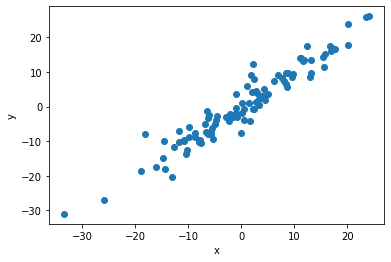

In [ ]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [ ]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [ ]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

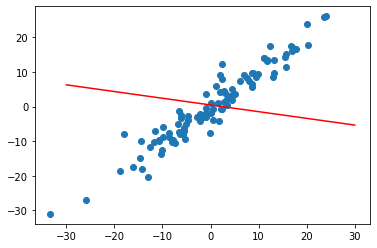

In [ ]:
plot_fit('Initial Model')

## Implementation

In [1]:
## loss fn => (y - wx)^2 
## error => y - y_hat => y - (wx+b)) , we initially take b = 0.

In [2]:
## so gradient is best way to find the lowest error. We can take derivative and move in the negetive direction to reach 0. => w1 = w0 - f'(w)
## the speed in which we move down is governed by the learning rate. Start small.

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

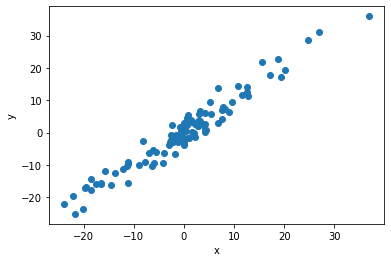

In [4]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [5]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [6]:

torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [7]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [8]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

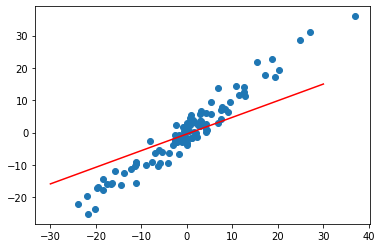

In [9]:

plot_fit('Initial Model')

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [11]:

epochs = 100  # if we only use 1 epoch, then it will be underfitting of data and too many can lead to overfitting.
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()  # initialize gradient to zero.
  loss.backward()  # derivative is computed this way.
  optimizer.step()  # called once gradient is computed with .backward method. -> update model parameters.

epoch: 0 loss: 35.84452438354492
epoch: 1 loss: 23.724830627441406
epoch: 2 loss: 16.72997283935547
epoch: 3 loss: 12.692630767822266
epoch: 4 loss: 10.362064361572266
epoch: 5 loss: 9.01647663116455
epoch: 6 loss: 8.239317893981934
epoch: 7 loss: 7.790201187133789
epoch: 8 loss: 7.530399322509766
epoch: 9 loss: 7.379851818084717
epoch: 10 loss: 7.292356967926025
epoch: 11 loss: 7.2412519454956055
epoch: 12 loss: 7.211149215698242
epoch: 13 loss: 7.193170547485352
epoch: 14 loss: 7.182191371917725
epoch: 15 loss: 7.1752519607543945
epoch: 16 loss: 7.170647621154785
epoch: 17 loss: 7.167393684387207
epoch: 18 loss: 7.164918899536133
epoch: 19 loss: 7.162900447845459
epoch: 20 loss: 7.161144256591797
epoch: 21 loss: 7.159542083740234
epoch: 22 loss: 7.1580328941345215
epoch: 23 loss: 7.1565775871276855
epoch: 24 loss: 7.155158042907715
epoch: 25 loss: 7.153759956359863
epoch: 26 loss: 7.1523756980896
epoch: 27 loss: 7.151003837585449
epoch: 28 loss: 7.149640083312988
epoch: 29 loss: 7.14

Text(0.5, 0, 'epoch')

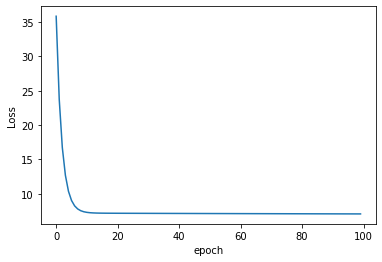

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

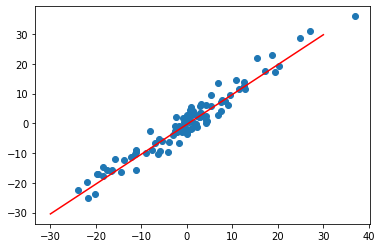

In [13]:
plot_fit("Trained Model")
